# 函数拟合
在使用$Relu$进行函数拟合时，我们选取一个非线性函数$f(x)=sin(cos(x))$作为拟合目标，自行在目标函数上随机采样生成训练集和测试集，我们通过TensorFlow中的深度学习框架进行拟合，训练，并输出最后拟合的结果

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
import matplotlib.pyplot as plt

In [2]:
# 定义目标函数
def target_function(x):
    return np.sin(np.cos(x))


In [3]:
# 生成训练集和测试集
np.random.seed(0)  # 设置随机种子，以确保可重复性
x_train = np.random.uniform(-2*np.pi, 2*np.pi, size=(1000, 1))  # 在区间[-2π, 2π]内随机采样生成训练数据
y_train = target_function(x_train) + np.random.normal(0, 0.1, size=(1000, 1))  # 添加一些噪声

x_test = np.random.uniform(-2*np.pi, 2*np.pi, size=(100, 1))  # 生成测试数据
y_test = target_function(x_test)  # 计算测试数据的标签，没有添加噪声


### (1)基于TensorFlow的深度学习框架进行训练

In [8]:
tf_model = keras.Sequential([
    layers.Dense(10,activation='relu',input_shape=(1,)),
    layers.Dense(10,activation='relu'),
    layers.Dense(1)
])

# 编译模型
tf_model.compile(optimizer='adam', loss='mean_squared_error')

#模型训练
history = tf_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=0)

#模型评估
test_loss = tf_model.evaluate(x_test,y_test,verbose=0)

print("Test Loss:",test_loss)



Test Loss: 0.004977272357791662


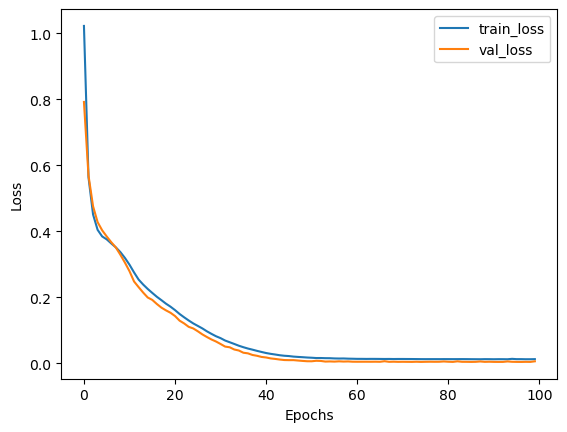

In [6]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [14]:
# class myModel:
#     def __init__(self):
#         self.fc1 = Relu()
#         self.fc2 = Relu()
#         self.w1 = np.random.randn(1,10)
#         self.w2 = np.random.randn(10,10)
#         self.w3 = np.random.randn(10,1)
#         self.b1 = np.zeros((1,10))
#         self.b2 = np.zeros((1,10))
#         self.b3 = np.zeros((1,1))
        
        
#     def forward(self, x):
#         h1 = np.dot(x,self.w1) + self.b1;
#         f_h1 = self.fc1.forward(h1)
#         h2 = np.dot(f_h1,self.w2) + self.b2
#         f_h2 = self.fc2.forward(h2)
#         output_res = np.dot(f_h2,self.w3) + self.b3
#         return output_res
            
#     def train(self,x,y,learning_rate = 0.01,epochs=1000):
#         for epoch in range(epochs):
#             # Forward pass
#             predictions = self.forward(x)
            
#             # Compute loss (mean squared error)
#             loss = np.mean((predictions - y) ** 2)
            
#             # Backward pass
#             grad_loss = 2 * (predictions - y) / len(x)  # Gradient of mean squared error
            
#             # Gradient for layer 3
#             grad_w3 = np.dot(self.fc2.mem['x'].T, grad_loss)
#             grad_b3 = np.sum(grad_loss, axis=0, keepdims=True)
#             grad_f_h2 = np.dot(grad_loss, self.w3.T)
            
#             # Gradient for layer 2
#             grad_h2 = self.fc2.backward(grad_f_h2)
#             grad_w2 = np.dot(self.fc1.mem['x'].T, grad_h2)
#             grad_b2 = np.sum(grad_h2, axis=0, keepdims=True)
#             grad_f_h1 = np.dot(grad_h2, self.w2.T)
            
#             # Gradient for layer 1
#             grad_h1 = self.fc1.backward(grad_f_h1)
#             grad_w1 = np.dot(x.T, grad_h1)
#             grad_b1 = np.sum(grad_h1, axis=0, keepdims=True)
            
#             # Update parameters using gradient descent
#             self.w1 -= learning_rate * grad_w1
#             self.b1 -= learning_rate * grad_b1
#             self.w2 -= learning_rate * grad_w2
#             self.b2 -= learning_rate * grad_b2
#             self.w3 -= learning_rate * grad_w3
#             self.b3 -= learning_rate * grad_b3
            
#             # print(grad_b1)
#             # if epoch % 100 == 0:
#             #     print(f'Epoch {epoch}, Loss: {loss}')

        
        
# my_model = myModel()

# my_model.train(x_train, y_train, learning_rate=0.01, epochs=1000)

# # 在测试集上进行预测
# predictions = my_model.forward(x_test)

# # 绘制拟合结果
# plt.scatter(x_test, y_test, label='True Data')
# plt.plot(x_test, predictions, color='red', label='Model Prediction')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()
